# Vamos aplicar o que aprendemos sobre regressões lineares

Corra a primeira célula de código para obter o dataframe com que vamos trabalhar

In [5]:
# faça o upload do ficheiro csv associado à atividade

# vamos importar a biblioteca
import pandas as pd
import numpy as np

# vamos importar o dataframe do ficheiro .csv
df_real_estate = (pd
                  .read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/Real estate.csv")
                  .drop(["No",
                         "X1 transaction date",
                         "X4 number of convenience stores"], axis = 1))

In [6]:
# veja as 5 primeiras linhas do dataframe
df_real_estate.head()

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,24.98298,121.54024,37.9
1,19.5,306.59470,24.98034,121.53951,42.2
2,13.3,561.98450,24.98746,121.54391,47.3
3,13.3,561.98450,24.98746,121.54391,54.8
4,5.0,390.56840,24.97937,121.54245,43.1


In [7]:
# veja as 5 primeiras linhas do dataframe
df_real_estate.head()
# veja a forma do dataframe: quantas linhas, quantas colunas?
df_real_estate.shape
# veja a informação sobre o dataframe
df_real_estate.info()
# veja a descrição das variáveis numéricas
df_real_estate.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X5 latitude                             414 non-null    float64
 3   X6 longitude                            414 non-null    float64
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(5)
memory usage: 16.3 KB


,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,24.969030,121.533361,37.980193
std,11.392485,1262.109595,0.012410,0.015347,13.606488
min,0.000000,23.382840,24.932070,121.473530,7.600000
25%,9.025000,289.324800,24.963000,121.528085,27.700000
50%,16.100000,492.231300,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,25.014590,121.566270,117.500000


In [8]:
# defina a variável alvo ("Y house price of unit area")
target_variable = "Y house price of unit area"

# train_test split usando a função train_test_split
# train_test split usando a função train_test_split
X = df_real_estate.drop([target_variable], axis = 1)
y = df_real_estate[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12)

In [9]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# defina o cv com 10 folds
kf = KFold(n_splits=10)

# crie o modelo de random forest
rf = RandomForestRegressor(random_state=42)

# defina a grid dos hyperparameters considerando
# n_estimators -> [50, 100, 200, 400]
# max_depth -> [None, 10, 20, 30]
# min_samples_split -> [2, 5, 10]

param_grid_rf = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# crie o dict de métricas (rmse, r2)
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# aplique a grid search ao modelo de Random Forest (faça fit para o rmse)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=kf, scoring=scoring, refit='rmse')
grid_search_rf.fit(X_train, y_train)

# obtenha os melhores hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest Regressor:", best_params_rf)

# obtenha o melhor score
best_score_rf = grid_search_rf.best_score_
print("Best Cross-Validation RMSE Score for Random Forest Regressor:", -best_score_rf)

# avalie os resultados para os diferentes k_folds
pd.DataFrame(grid_search_rf.cv_results_)

# obtenha o melhor modelo
best_rf = grid_search_rf.best_estimator_

# faça as previsões
y_pred_rf = best_rf.predict(X_test)

# avalie as métricas finais
print("\nRandom Forest Regressor Evaluation")
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_rf)**(1/2))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Best Parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation RMSE Score for Random Forest Regressor: 7.963891869628898

Random Forest Regressor Evaluation
Root Mean Squared Error: 6.642878420704766
R2 Score: 0.7340004253254164


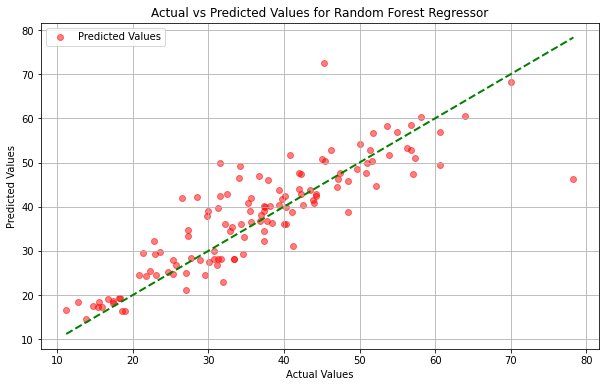

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
#plt.scatter(y_test, y_test, alpha=0.5, label='Actual Values', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predicted Values', color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', lw=2, linestyle='--')

# Plot details
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [27]:

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})

comparison_df_sorted = comparison_df.sort_values(by='Actual').reset_index(drop=True)

# Display the first few rows of the comparison DataFrame
print("\nComparison of Actual and Predicted Values:")
print(comparison_df_sorted.head())


Comparison of Actual and Predicted Values:
   Actual  Predicted
0    11.2  16.584000
1    12.8  18.382533
2    13.8  14.498000
3    14.7  17.570000
4    15.4  17.251867


In [28]:
comparison_df_sorted

,Actual,Predicted
0,11.2,16.584000
1,12.8,18.382533
2,13.8,14.498000
3,14.7,17.570000
4,15.4,17.251867
...,...,...
120,60.7,56.854000
121,60.7,49.480000
122,63.9,60.482700
123,70.1,68.304456
